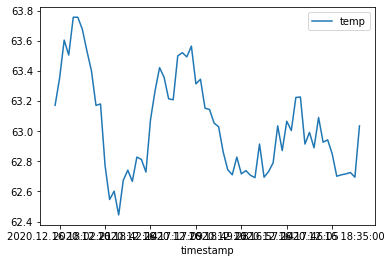

In [2]:
import boto3
import pandas as pd

dynamodb = boto3.resource('dynamodb')
table = dynamodb.Table('iot-temp')

response = table.scan()
data = response.get('Items', [])
temps = [item['payload'] for item in data]
type(temps[0]['timestamp'])
dataset = pd.DataFrame(temps)
dataset['temp'] = dataset['temp'].apply(lambda x: float(x))
dataset['timestamp'] = dataset['timestamp'].apply(lambda x: pd.Timestamp(int(x), unit='ms', tz = 'US/Pacific').strftime('%Y.%m.%d %H:%M:%S'))
dataset.set_index('timestamp', inplace = True)

avg = dataset.rolling(10).mean()
avg.plot()